In [45]:
import torch
import cv2
import matplotlib.pyplot as plt
import os

from jupyter_server.transutils import base_dir

# Set the base directory where your models are located
BASE_DIR = os.getcwd()  # This will get the current working directory

# Load the yolov11n model from your specific path
yolov11n_model_path = os.path.join(BASE_DIR, 'models', 'yolo11n.pt')

# Load the YOLOv5 model
yolov11n_model = torch.hub.load('ultralytics/yolov5:v6.0', 'custom', path=yolov11n_model_path)

# Set the image path (adjust to the path where your image is located)
image_path = os.path.join(BASE_DIR, 'photos','test1.jpg')  # Replace with your image file name

# Read the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB for displaying with matplotlib

# Run inference with yolov11n model
yolov11n_results = yolov11n_model(img_rgb)

# Display the results for yolov11n
yolov11n_results.show()  # This will display the output with bounding boxes for license plates

# You can save the output as well
yolov11n_results.save()  # Save the yolov11n output

# Optionally, show the result in a plot if you don't want to use `.show()`
plt.imshow(yolov11n_results.render()[0])  # This will render and display the yolov11n results
plt.axis('off')
plt.show()


Using cache found in C:\Users\Arshia/.cache\torch\hub\ultralytics_yolov5_v6.0
YOLOv5  2025-12-27 torch 2.9.1+cpu CPU



Exception: Cache may be out of date, try `force_reload=True`. See https://github.com/ultralytics/yolov5/issues/36 for help.

In [ ]:
import matplotlib.pyplot as plt

from ultralytics import YOLO

BASE_DIR = os.getcwd()
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')
model = YOLO(os.path.join(BASE_DIR , model_path))

results = model(os.path.join(BASE_DIR, 'photos', 'test1.jpg') )
plt.imshow(results[0].plot())
plt.axis("off")
for r in results:
    for box in r.boxes:
        print("XYXY:", box.xyxy[0].tolist())
        print("Confidence:", float(box.conf))
        print("Class:", int(box.cls))

In [ ]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the base directory and model path
BASE_DIR = os.getcwd()
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')

# Load the trained model (best.pt)
model = YOLO(model_path)

# Perform inference on the image
image_path = os.path.join(BASE_DIR, 'photos', 'test1.jpg')  # Update with your image path
results = model(image_path)

# Plot the results (image with bounding boxes)
plt.imshow(results[0].plot())  # Plot the first result (image with bounding boxes)
plt.axis("off")  # Hide axes
plt.show()  # Display the image

# Print the bounding box details (coordinates, confidence, and class)
for r in results:
    for box in r.boxes:
        print("XYXY:", box.xyxy[0].tolist())  # Bounding box coordinates (x1, y1, x2, y2)
        print("Confidence:", float(box.conf))  # Confidence score for the detection
        print("Class:", int(box.cls))  # Class label (int)


In [ ]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the base directory and model path
BASE_DIR = os.getcwd()
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')

# Load the trained model (best.pt)
model = YOLO(model_path)

# Array of photo paths you want to test (replace with your actual photo paths)
photo_paths = [
    os.path.join(BASE_DIR, 'photos', 'test1.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test2.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test3.jpg')
]

# Confidence threshold for detections (e.g., only show detections with confidence >= 70%)
confidence_threshold = 0.70

# Loop through each image in the photo_paths array
for image_path in photo_paths:
    # Perform inference on the image
    results = model(image_path)

    # Plot the results (image with bounding boxes)
    plt.figure(figsize=(10, 10))
    plt.imshow(results[0].plot())  # Plot the first result (image with bounding boxes)
    plt.axis("off")  # Hide axes
    plt.show()  # Show the image with the bounding boxes

    # Print bounding box details (coordinates, confidence, and class) for detections >= 70% confidence
    for r in results:
        for box in r.boxes:
            conf = float(box.conf)
            if conf >= confidence_threshold:
                print(f"Image: {image_path}")
                print("XYXY:", box.xyxy[0].tolist())  # Bounding box coordinates (x1, y1, x2, y2)
                print("Confidence:", conf)  # Confidence score for the detection
                print("Class:", int(box.cls))  # Class label (int)
                print("---")


In [36]:
import torch
import cv2
import os
import matplotlib.pyplot as plt

# Define the base directory
BASE_DIR = os.getcwd()

# Load the custom YOLOv11n model (torch.load)
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')  # Custom model path
model = torch.load(model_path)  # Load the model directly

# List of image paths you want to test
image_paths = [
    os.path.join(BASE_DIR, 'photos', 'test1.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test2.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test3.jpg')
]

# Create a directory to save the cropped license plates
crop_dir = os.path.join(BASE_DIR, 'plate_crops')
os.makedirs(crop_dir, exist_ok=True)

# Confidence threshold (e.g., only keep boxes with confidence >= 70%)
conf_thresh = 0.70

# Loop through each image path and run inference
for image_path in image_paths:
    # Read the image
    img = cv2.imread(image_path)

    # Convert image to tensor if necessary (e.g., resize, normalize)
    # Example: resize image to 640x640 (adjust as needed)
    img_resized = cv2.resize(img, (640, 640))

    # Run inference (assuming the model expects the image in a certain format)
    # Example: if model is a YOLO model, run it on the image
    results = model(img_resized)

    # Display the results (bounding boxes, labels, etc.)
    plt.imshow(results[0].plot())  # Assuming results are in a format that supports plot()
    plt.axis("off")
    plt.show()

    crop_index = 0
    for box in results[0].boxes:
        conf = float(box.conf)
        if conf < conf_thresh:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        print("XYXY:", [x1, y1, x2, y2])
        print("Confidence:", conf)

        # Perform crop
        crop = img[y1:y2, x1:x2]

        # Save the cropped plate
        crop_path = os.path.join(crop_dir, f"{os.path.basename(image_path)}_crop{crop_index}.jpg")
        cv2.imwrite(crop_path, crop)
        print(f"✔ Saved crop: {crop_path}")

        crop_index += 1


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL ultralytics.nn.tasks.DetectionModel was not an allowed global by default. Please use `torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])` or the `torch.serialization.safe_globals([ultralytics.nn.tasks.DetectionModel])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.


0: 608x640 2 plates, 29.1ms
1: 608x640 2 plates, 29.1ms
2: 608x640 1 plate, 29.1ms
Speed: 2.4ms preprocess, 29.1ms inference, 0.3ms postprocess per image at shape (1, 3, 608, 640)

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test1.jpg =====


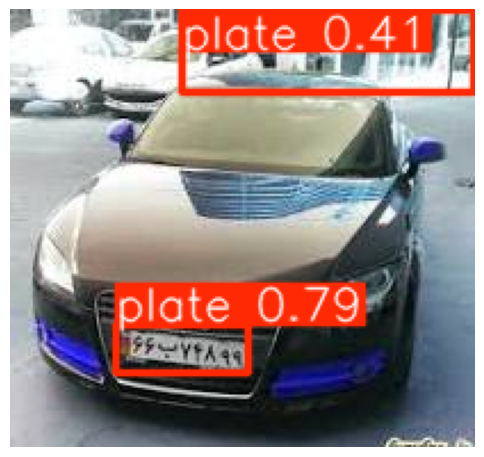

XYXY: [46, 138, 104, 159]
Confidence: 0.7882588505744934
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test1.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test2.jpg =====


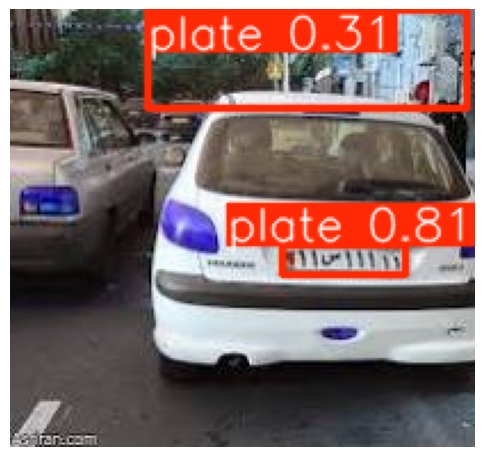

XYXY: [119, 103, 173, 116]
Confidence: 0.8080288171768188
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test2.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test3.jpg =====


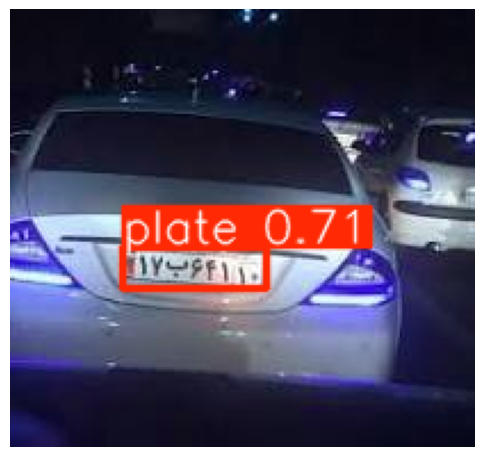

XYXY: [49, 104, 112, 122]
Confidence: 0.711371123790741
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test3.jpg_crop0.jpg


In [39]:
import torch
import os
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Add the custom global class to the safe globals for deserialization
torch.serialization.add_safe_globals([ 'ultralytics.nn.tasks.DetectionModel'])

# Define the base directory
BASE_DIR = os.getcwd()

# Load the trained YOLOv11n model (best.pt)
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')
model = YOLO(model_path)  # We can now safely load the custom model

# List of image paths you want to test
image_paths = [
    os.path.join(BASE_DIR, 'photos', 'test1.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test2.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test3.jpg')
]

# Create a directory to save the cropped license plates
crop_dir = os.path.join(BASE_DIR, 'plate_crops')
os.makedirs(crop_dir, exist_ok=True)

# Confidence threshold (e.g., only keep boxes with confidence >= 70%)
conf_thresh = 0.70

# Run the model on the images
results = model(image_paths)

# Process each image and its results
for path, r in zip(image_paths, results):
    print(f"\n===== IMAGE: {path} =====")

    # Display the image with bounding boxes
    plt.figure(figsize=(6, 6))
    plt.imshow(r.plot())
    plt.axis("off")
    plt.show()

    # Read the original image for cropping
    img = cv2.imread(path)

    crop_index = 0
    for box in r.boxes:
        conf = float(box.conf)

        # Skip boxes with low confidence
        if conf < conf_thresh:
            continue

        # Get the bounding box coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        print("XYXY:", [x1, y1, x2, y2])
        print("Confidence:", conf)

        # Perform the crop (cut out the license plate area)
        crop = img[y1:y2, x1:x2]

        # Save the cropped plate image
        crop_path = os.path.join(crop_dir, f"{os.path.basename(path)}_crop{crop_index}.jpg")
        cv2.imwrite(crop_path, crop)
        print(f"✔ Saved crop: {crop_path}")

        crop_index += 1



0: 640x640 1 plate, 33.9ms
1: 640x640 2 plates, 33.9ms
2: 640x640 1 plate, 33.9ms
3: 640x640 1 plate, 33.9ms
4: 640x640 1 plate, 33.9ms
5: 640x640 1 plate, 33.9ms
6: 640x640 3 plates, 33.9ms
Speed: 2.3ms preprocess, 33.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test1.jpg =====


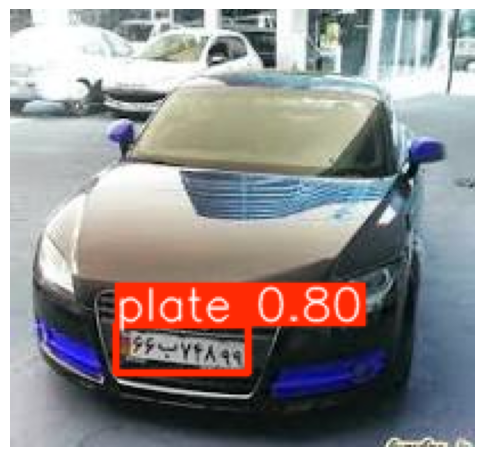

XYXY: [46, 138, 104, 159]
Confidence: 0.8040502667427063
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test1.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test2.jpg =====


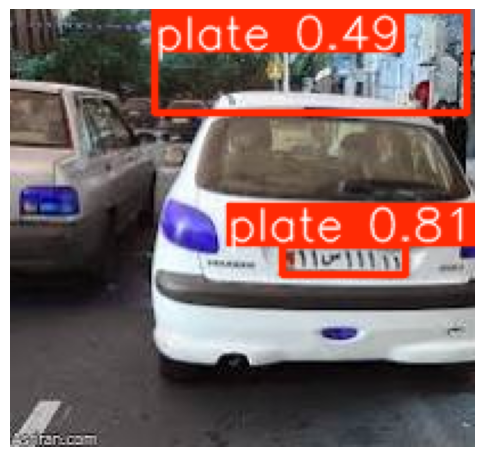

XYXY: [119, 103, 173, 116]
Confidence: 0.8148036599159241
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test2.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test3.jpg =====


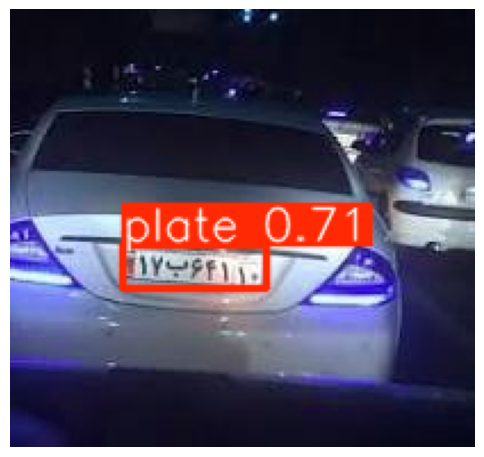

XYXY: [49, 103, 112, 122]
Confidence: 0.7143142819404602
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test3.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test4.jpg =====


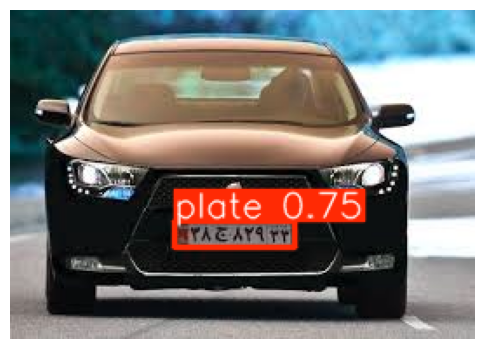

XYXY: [94, 121, 163, 136]
Confidence: 0.7459220290184021
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test4.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test5.jpg =====


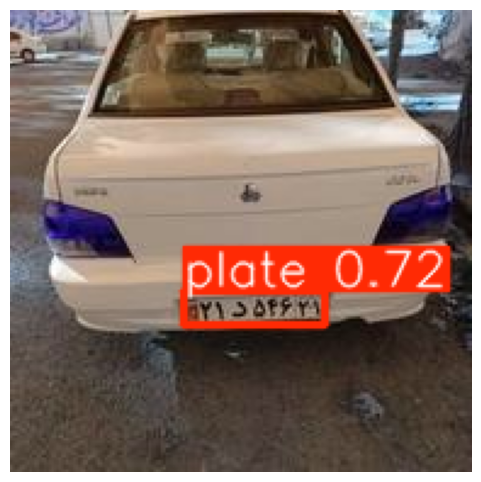

XYXY: [71, 115, 129, 129]
Confidence: 0.7177594304084778
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test5.jpg_crop0.jpg

===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test6.jpg =====


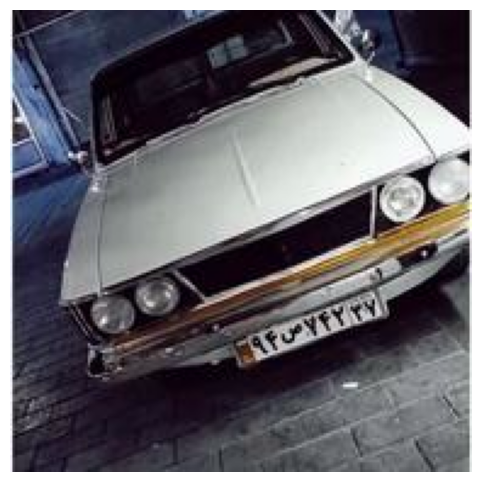


===== IMAGE: C:\Users\Arshia\PycharmProjects\PLPR\photos\test7.jpg =====


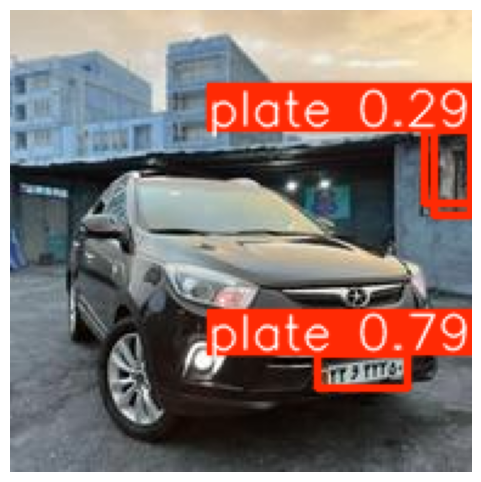

XYXY: [126, 141, 163, 155]
Confidence: 0.7920174598693848
✔ Saved crop: C:\Users\Arshia\PycharmProjects\PLPR\plate_crops\test7.jpg_crop0.jpg


In [47]:
import torch
import os
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Add the custom global class to the safe globals for deserialization
torch.serialization.add_safe_globals([ 'ultralytics.nn.tasks.DetectionModel'])

# Define the base directory
BASE_DIR = os.getcwd()

# Load the trained YOLOv11n model (best.pt)
model_path = os.path.join(BASE_DIR, 'models', 'best.pt')
model = YOLO(model_path)  # We can now safely load the custom model

# List of image paths you want to test
image_paths = [
    os.path.join(BASE_DIR, 'photos', 'test1.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test2.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test3.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test4.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test5.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test6.jpg'),
    os.path.join(BASE_DIR, 'photos', 'test7.jpg'),


]

# Create a directory to save the cropped license plates
crop_dir = os.path.join(BASE_DIR, 'plate_crops')
os.makedirs(crop_dir, exist_ok=True)

# Confidence threshold (e.g., only keep boxes with confidence >= 70%)
conf_thresh = 0.70

# Run the model on the images
results = model(image_paths)

# Process each image and its results
for path, r in zip(image_paths, results):
    print(f"\n===== IMAGE: {path} =====")

    # Create a new image to plot the results on
    img = cv2.imread(path)

    # Only keep boxes with confidence >= 70%
    boxes = []
    for box in r.boxes:
        conf = float(box.conf)

        if conf >= conf_thresh:
            # Keep the box if its confidence is above the threshold
            boxes.append(box)

    # Plot the image with only the boxes with confidence >= 70%
    plt.figure(figsize=(6, 6))
    plt.imshow(r.plot(boxes=boxes))  # Plot the filtered boxes
    plt.axis("off")
    plt.show()

    crop_index = 0
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf)
        print("XYXY:", [x1, y1, x2, y2])
        print("Confidence:", conf)

        # Perform the crop (cut out the license plate area)
        crop = img[y1:y2, x1:x2]

        # Save the cropped plate image
        crop_path = os.path.join(crop_dir, f"{os.path.basename(path)}_crop{crop_index}.jpg")
        cv2.imwrite(crop_path, crop)
        print(f"✔ Saved crop: {crop_path}")

        crop_index += 1
